# Simple Starter Notebook for;
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
#from google.colab import files

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [3]:
# check data shapes
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [4]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [5]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [6]:
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


# Let's look for missing values

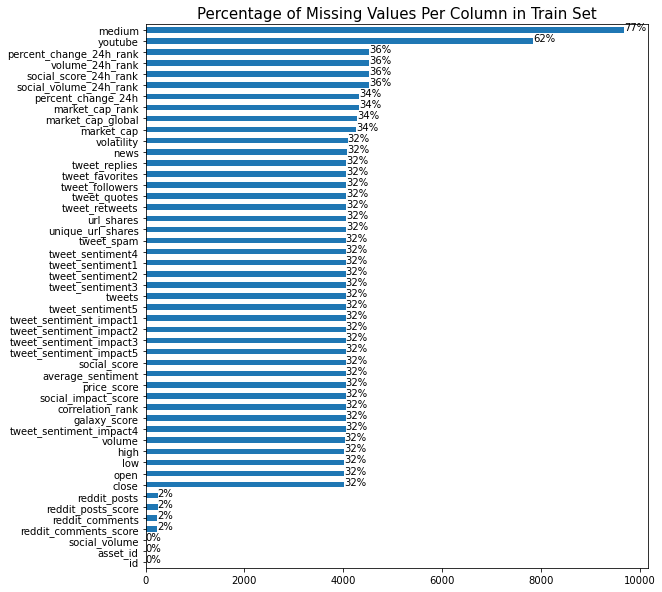

In [7]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

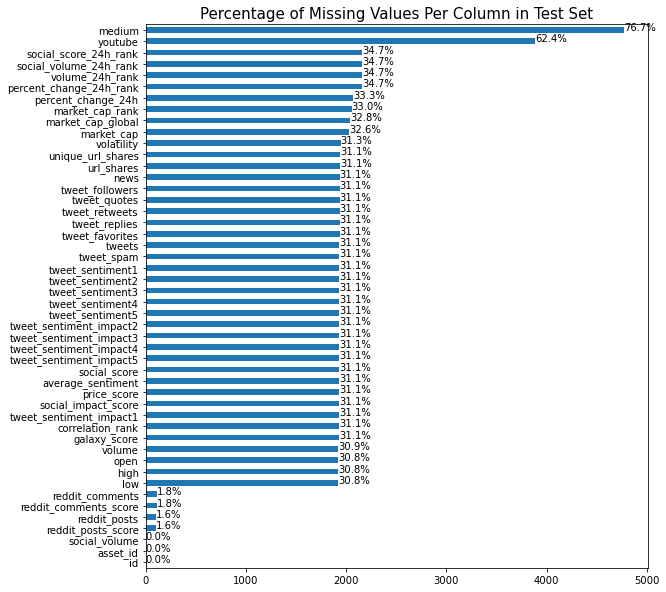

In [8]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# Dropped two columns

In [9]:
train = train.drop(columns=['medium','youtube'],axis = 1)
train.shape

(12632, 47)

In [10]:
# fill missing values
train = train.replace(0,np.nan).interpolate()
test = test.fillna(0)

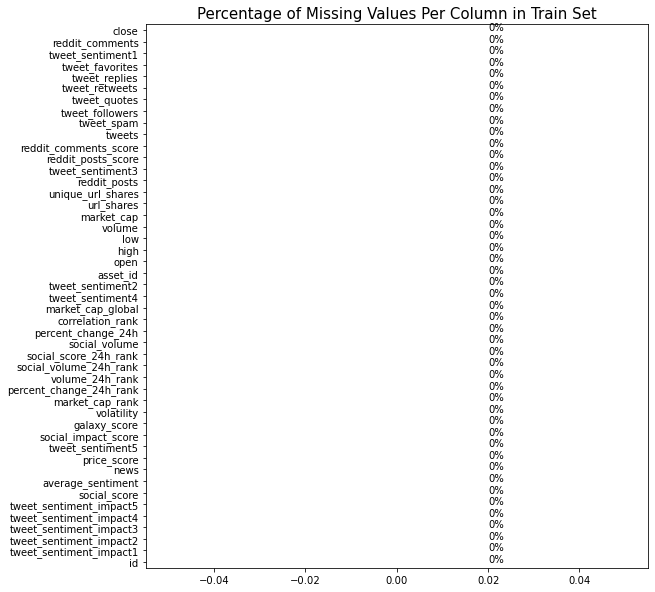

In [11]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [12]:
# Check for duplicates in rows
train.duplicated().any(), test.duplicated().any()

(False, False)

In [13]:
#Check duplicated colunms
train_2 = train.T
train_2.duplicated().sum()

0

In [14]:
train['id'].value_counts().sum()

#noticed that id colunm is unique for each record
train = train.drop(columns='id',axis = 1)


In [15]:
train['asset_id'].value_counts().sum()
train = train.drop(columns='asset_id',axis = 1)
train.describe()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
count,12632.000000,12632.000000,12632.000000,1.263200e+04,1.263200e+04,12632.000000,12632.000000,12632.000000,12632.00000,12632.000000,...,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,1.263200e+04,12632.000000
mean,15564.819901,15619.537434,15508.283740,1.313300e+09,2.836430e+11,1250.035940,759.426892,36.588545,324.90053,101.381848,...,0.015491,1.000871,810.305177,2.128879,1.019118,1.005779,3920.713268,0.356149,4.635820e+11,15566.615990
std,13091.282988,13170.490662,13013.093589,1.657726e+09,2.460172e+11,550.745434,281.507427,31.477561,672.85606,89.010460,...,0.018031,0.054116,205.786128,0.392978,0.124750,0.069644,4824.053810,3.448854,4.242692e+11,13096.843192
min,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,1.00000,1.000000,...,0.001580,1.000000,124.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,8617.778171,8633.473469,8601.065313,6.720527e+08,1.558125e+11,893.000000,578.000000,13.000000,80.00000,41.000000,...,0.007535,1.000000,677.625000,2.000000,1.000000,1.000000,243.000000,-1.166990,2.371734e+11,8619.512946
50%,9823.955517,9849.129193,9798.582806,1.035417e+09,1.783128e+11,1150.000000,713.000000,28.000000,157.00000,65.000000,...,0.011797,1.000000,818.000000,2.000000,1.000000,1.000000,3334.000000,0.244639,2.789000e+11,9823.454666
75%,15401.276796,15419.413701,15362.665079,1.601395e+09,2.545295e+11,1491.000000,884.000000,50.000000,330.00000,142.000000,...,0.018499,1.000000,953.000000,2.000000,1.000000,1.000000,5178.000000,1.771269,4.094509e+11,15396.394085
max,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.00000,1333.000000,...,0.740612,6.000000,1490.000000,10.000000,2.000000,2.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [16]:
labels = (train.columns.values)
labels

array(['open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets',
       'tweet_replies', 'tweet_favorites', 'tweet_sentiment1',
       'tweet_sentiment2', 'tweet_sentiment3', 'tweet_sentiment4',
       'tweet_sentiment5', 'tweet_sentiment_impact1',
       'tweet_sentiment_impact2', 'tweet_sentiment_impact3',
       'tweet_sentiment_impact4', 'tweet_sentiment_impact5',
       'social_score', 'average_sentiment', 'news', 'price_score',
       'social_impact_score', 'correlation_rank', 'galaxy_score',
       'volatility', 'market_cap_rank', 'percent_change_24h_rank',
       'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'social_volume', 'percent_change_24h',
       'market_cap_global', 'close'], dtype=object)

In [17]:
#applying standard scaling to dataset
from sklearn.preprocessing import MinMaxScaler
scalor = MinMaxScaler()
train_sc = scalor.fit_transform(train)

train = pd.DataFrame(train_sc, columns=labels)
train


,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,0.085780,0.085014,0.090757,0.009218,0.084984,0.166947,0.167077,0.108216,0.003403,0.045045,...,0.007493,0.0,0.352855,0.111111,0.0,0.0,0.031482,0.579294,0.082205,0.090556
1,0.060500,0.059777,0.065139,0.003160,0.055590,0.090846,0.111111,0.038076,0.017344,0.076577,...,0.010607,0.0,0.384334,0.166667,0.0,0.0,0.015367,0.530388,0.046575,0.064926
2,0.785331,0.787188,0.788664,0.053863,0.787877,0.142900,0.199467,0.142285,0.037666,0.139640,...,0.016170,0.0,0.415813,0.222222,0.0,0.0,0.075490,0.623350,0.726011,0.787008
3,0.445341,0.445827,0.448178,0.035772,0.445113,0.121425,0.164924,0.032064,0.013843,0.200450,...,0.014007,0.0,0.436676,0.166667,0.0,0.0,0.002022,0.608701,0.418770,0.447173
4,0.105351,0.104467,0.107691,0.017681,0.102350,0.099951,0.130381,0.046092,0.001342,0.036787,...,0.011843,0.0,0.457540,0.111111,0.0,0.0,0.028448,0.594051,0.111529,0.107339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,0.153170,0.152385,0.158195,0.007666,0.151708,0.094161,0.133149,0.002004,0.001963,0.102853,...,0.015899,0.0,0.565886,0.111111,0.0,0.0,0.000990,0.572287,0.134591,0.157816
12628,0.048351,0.047735,0.053259,0.002796,0.045706,0.059673,0.094301,0.030060,0.007069,0.028529,...,0.024806,0.0,0.646413,0.111111,0.0,0.0,0.014377,0.579947,0.038910,0.053276
12629,0.075022,0.074544,0.078994,0.042133,0.073978,0.163384,0.154777,0.146293,0.008116,0.044294,...,0.025892,0.0,0.581259,0.111111,0.0,0.0,0.041202,0.587607,0.065469,0.080031
12630,0.089977,0.089120,0.094670,0.014506,0.088513,0.135972,0.134276,0.076152,0.002618,0.031532,...,0.014656,0.0,0.350659,0.111111,0.0,0.0,0.033312,0.595268,0.079085,0.094590


# Feature selection

In [18]:
train = train.drop(columns='close')


In [19]:
#returns highly correlated features

def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(train,0.7)
len(set(corr_features))

19

In [21]:
train = train.drop(corr_features, axis = 1)
train

,open,volume,url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_quotes,tweet_retweets,...,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,social_volume_24h_rank,social_score_24h_rank,percent_change_24h
0,0.085780,0.009218,0.166947,0.108216,0.003403,0.045045,0.001322,0.023047,0.000625,0.003010,...,0.4250,0.6500,0.5750,0.574257,0.007493,0.0,0.352855,0.0,0.0,0.579294
1,0.060500,0.003160,0.090846,0.038076,0.017344,0.076577,0.002605,0.009163,0.003192,0.002397,...,0.2500,0.2500,0.0000,0.128713,0.010607,0.0,0.384334,0.0,0.0,0.530388
2,0.785331,0.053863,0.142900,0.142285,0.037666,0.139640,0.004426,0.065702,0.001695,0.004517,...,0.5250,0.5000,0.5750,0.564356,0.016170,0.0,0.415813,0.0,0.0,0.623350
3,0.445341,0.035772,0.121425,0.032064,0.013843,0.200450,0.002164,0.043806,0.001012,0.002829,...,0.7250,0.6000,0.7125,0.737624,0.014007,0.0,0.436676,0.0,0.0,0.608701
4,0.105351,0.017681,0.099951,0.046092,0.001342,0.036787,0.000842,0.021910,0.000329,0.001141,...,0.9250,0.7000,0.8500,0.910891,0.011843,0.0,0.457540,0.0,0.0,0.594051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,0.153170,0.007666,0.094161,0.002004,0.001963,0.102853,0.000783,0.021079,0.000880,0.001234,...,0.4875,0.6625,0.3875,0.539604,0.015899,0.0,0.565886,0.0,0.0,0.572287
12628,0.048351,0.002796,0.059673,0.030060,0.007069,0.028529,0.000759,0.009235,0.000132,0.000375,...,0.5750,0.5000,0.4000,0.514851,0.024806,0.0,0.646413,0.0,0.0,0.579947
12629,0.075022,0.042133,0.163384,0.146293,0.008116,0.044294,0.000519,0.033355,0.001497,0.002525,...,0.4500,0.5000,0.7250,0.594059,0.025892,0.0,0.581259,0.0,0.0,0.587607
12630,0.089977,0.014506,0.135972,0.076152,0.002618,0.031532,0.000592,0.026610,0.002501,0.001950,...,0.5000,0.8500,0.8750,0.821782,0.014656,0.0,0.350659,0.0,0.0,0.595268


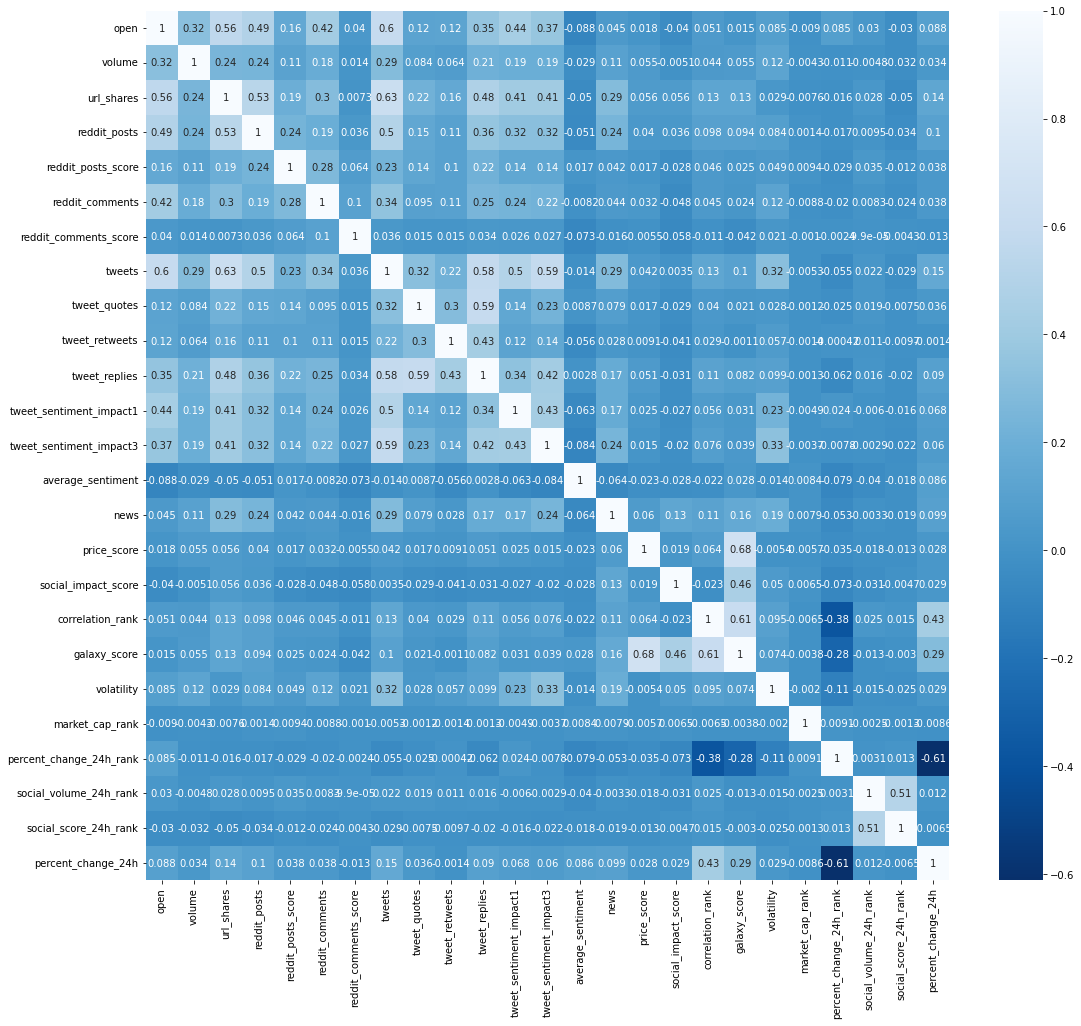

In [22]:
import seaborn as sns
plt.figure(figsize = (18,16))
cor = train.corr()
sns.heatmap(cor,annot = True, cmap = plt.cm.Blues_r)
plt.show()

In [23]:
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close'])
X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

AttributeError: 'DataFrame' object has no attribute 'close'

In [ ]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [ ]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
sub_file.head()

In [ ]:
files.download('Baseline.csv') 